<a href="https://colab.research.google.com/github/srikant-sah/ML_works/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction using Machine Learning


## Objective


The aim is to estimate whether a bank's customers leave the bank or not. The event that defines the customer abandonment is the closing of the customer's bank account.

## Details about the dataset:
It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### **Variables:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [7]:
# importing required liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')   # loading the dataset into a dataframe


In [9]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
print(f'Number of records are : {len(df)}')
print(f'Number of columns are : {len(df.columns)}')

Number of records are : 10000
Number of columns are : 14


In [11]:
df.info()   # overviewing the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


No Null values are present in the Dataset .

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'] ,inplace = True)   # dropping the columns which are not required

"RowNumber" , "CustomerId" and "Surname" columns are of no use for our model . Therefore those columns has been deleted to make the dataset cleaner and more appropriate .


In [13]:
df.describe()   # statistical summary of the dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Everything looks fine except the column **"EstimatedSalary"** . If we observe clearly the minimum value is **11.58** which can not be true . thus the column certainly has outliers .

In [14]:
df.dtypes   # checking the datatypes of each column

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


All the columns have correct data  type . No changes are required .

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

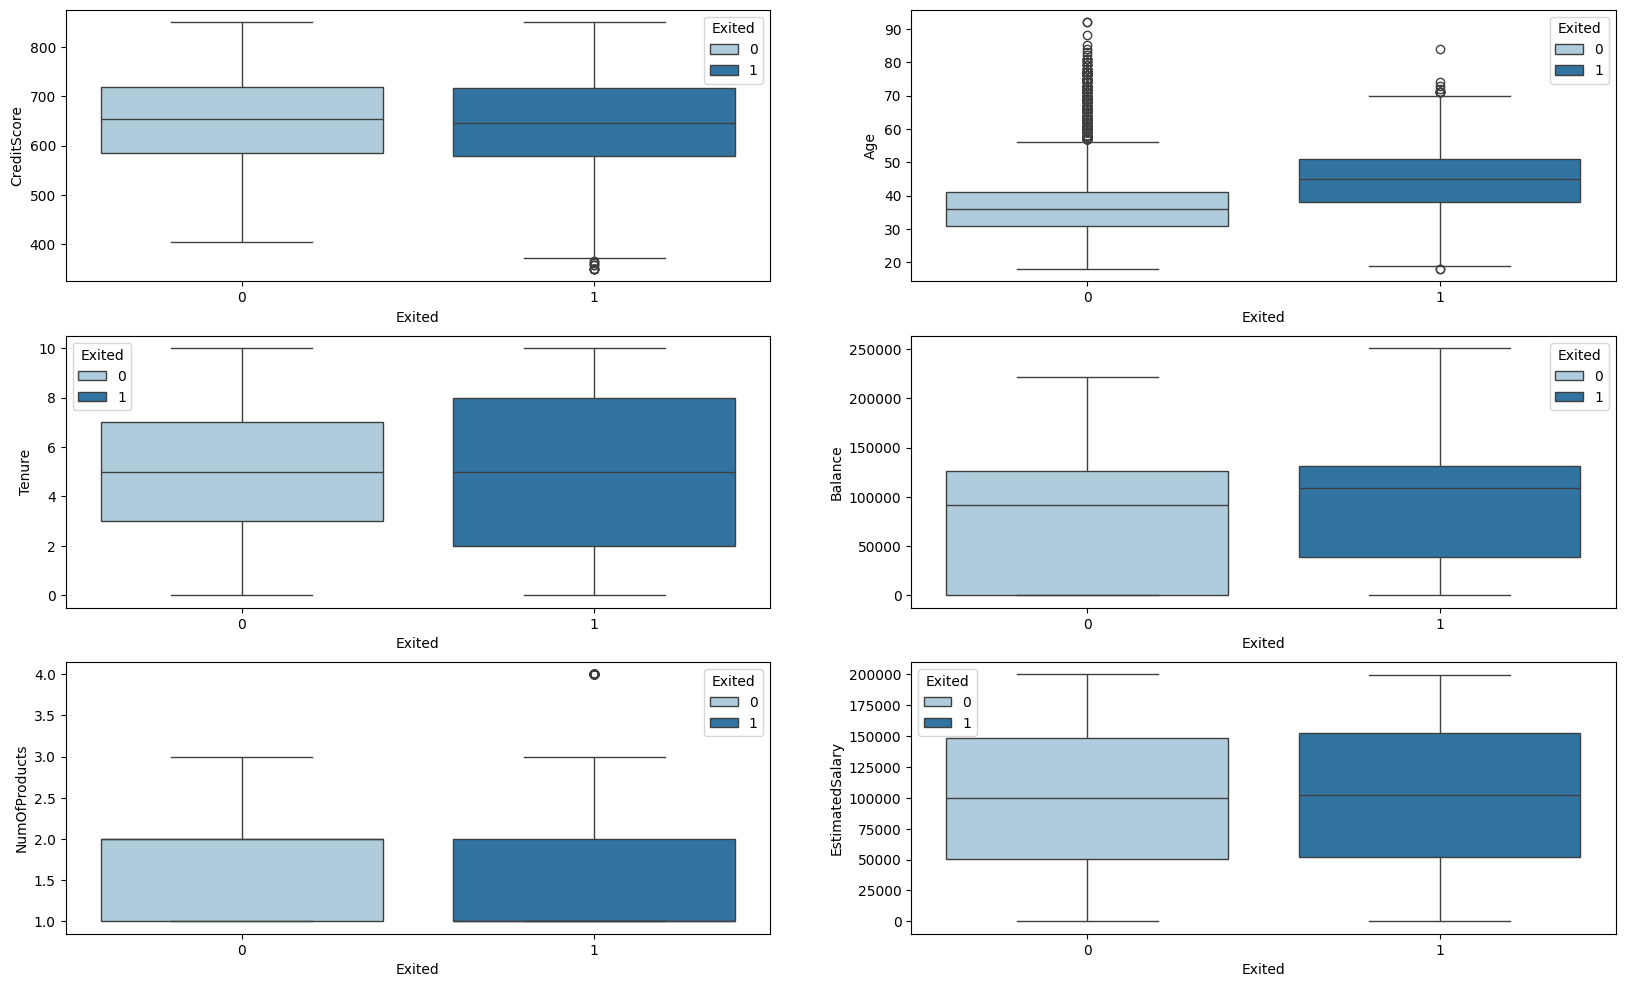

In [15]:
# Boxplot graph for outlier observation analysis
sns.set_palette('Paired')
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [16]:
# Outlier Observation Analysis
for feature in df[['CreditScore','Tenure', 'Balance','EstimatedSalary','Age']]:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Tenure no
Balance no
EstimatedSalary no
Age yes


# **Exploratory Data Analysis**

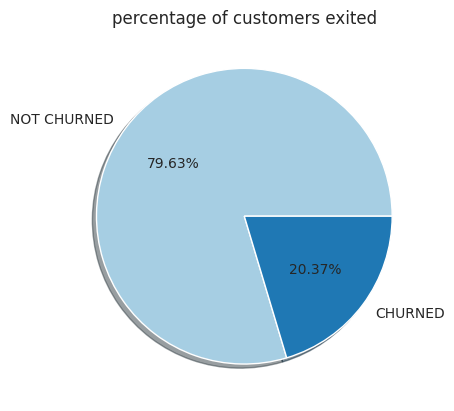

In [17]:
sns.set_palette('Paired')
sns.set_style('dark')
plt.pie( x = df['Exited'].value_counts() ,autopct='%5.2f%%' ,labels=['NOT CHURNED','CHURNED'],shadow = True)
plt.title('percentage of customers exited')
plt.show()


<Axes: xlabel='IsActiveMember', ylabel='count'>

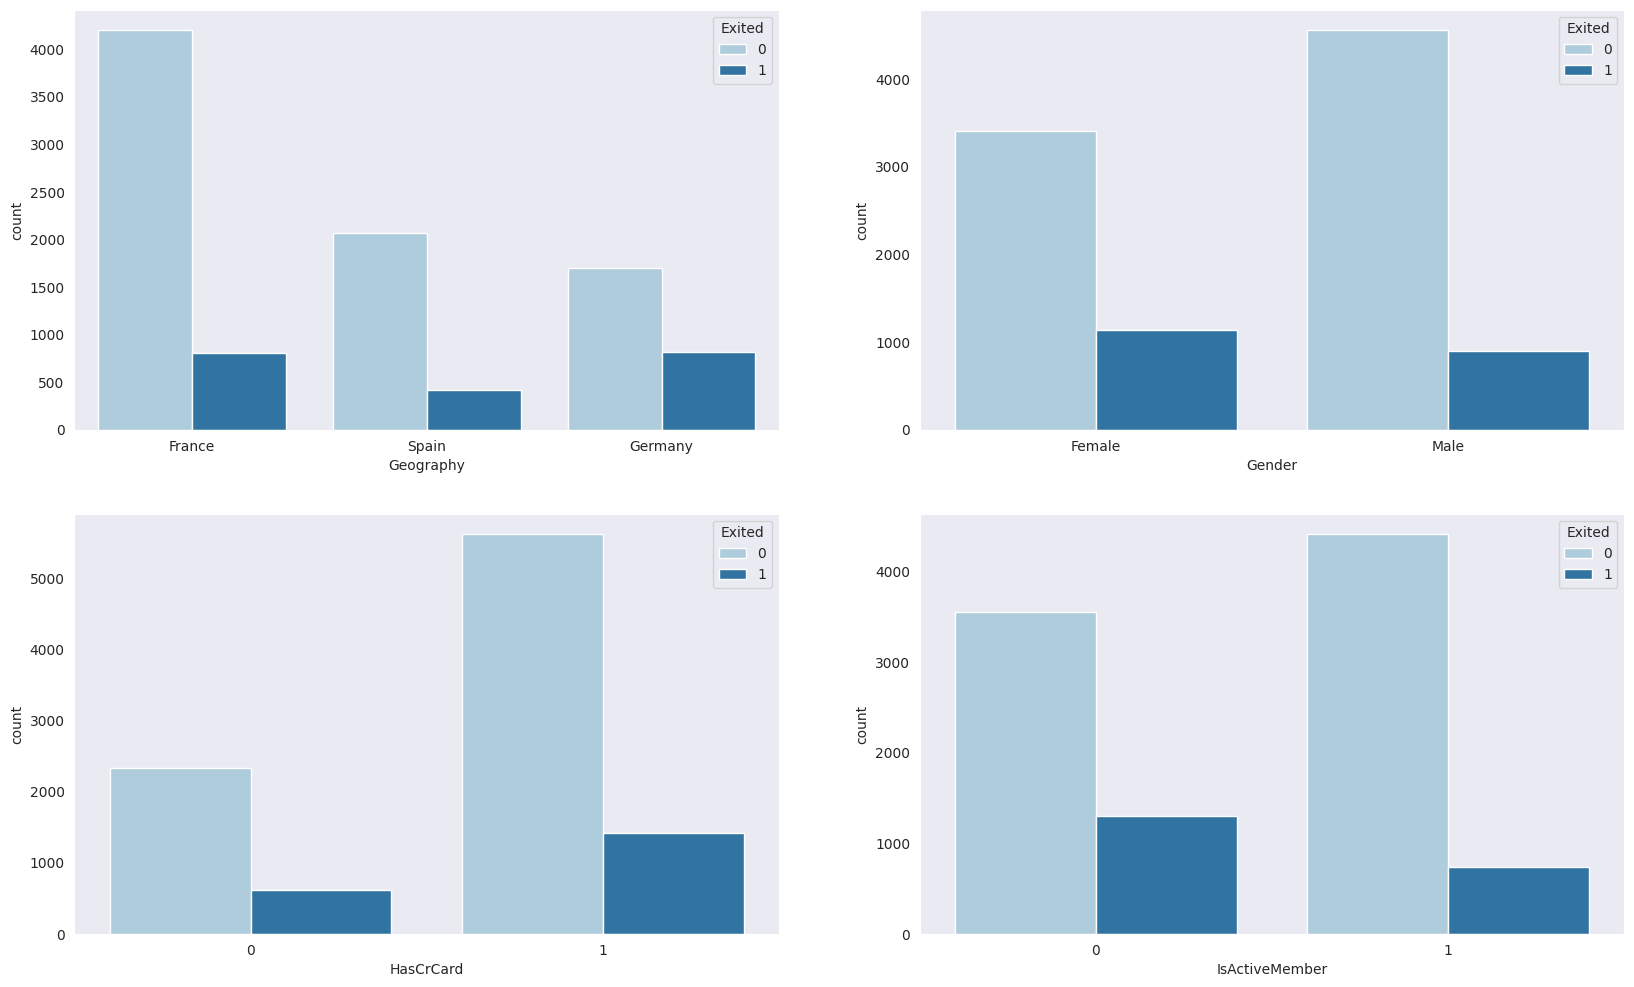

In [18]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

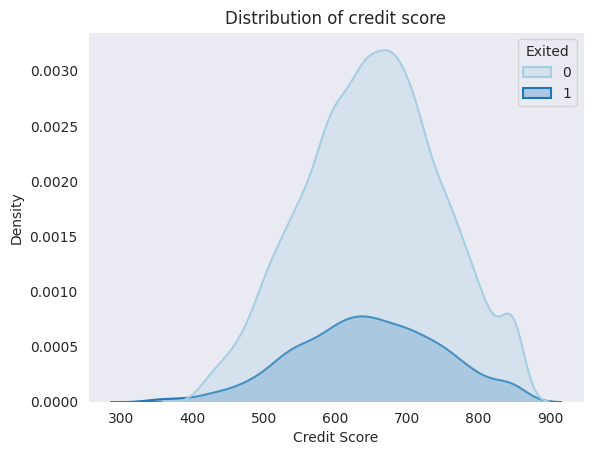

In [19]:
sns.set_style('dark')
sns.kdeplot(data=df, x=df['CreditScore'],hue = df['Exited'] , fill = True, common_norm= True , alpha = .3 , linewidth = 1.5)
plt.title('Distribution of credit score')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.show()



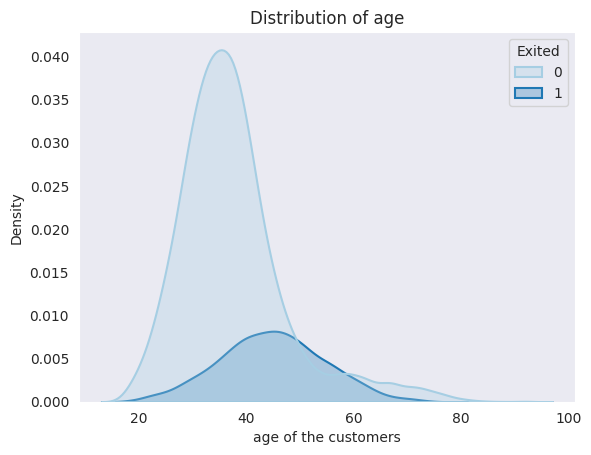

In [20]:
sns.set_style('dark')
sns.kdeplot(data=df, x=df['Age'],hue = df['Exited'] , fill = True, common_norm= True , alpha = .3 , linewidth = 1.5 , common_grid= True)
plt.title('Distribution of age')
plt.xlabel('age of the customers')
plt.ylabel('Density')
plt.show()



Text(0.5, 0, 'Credit Score')

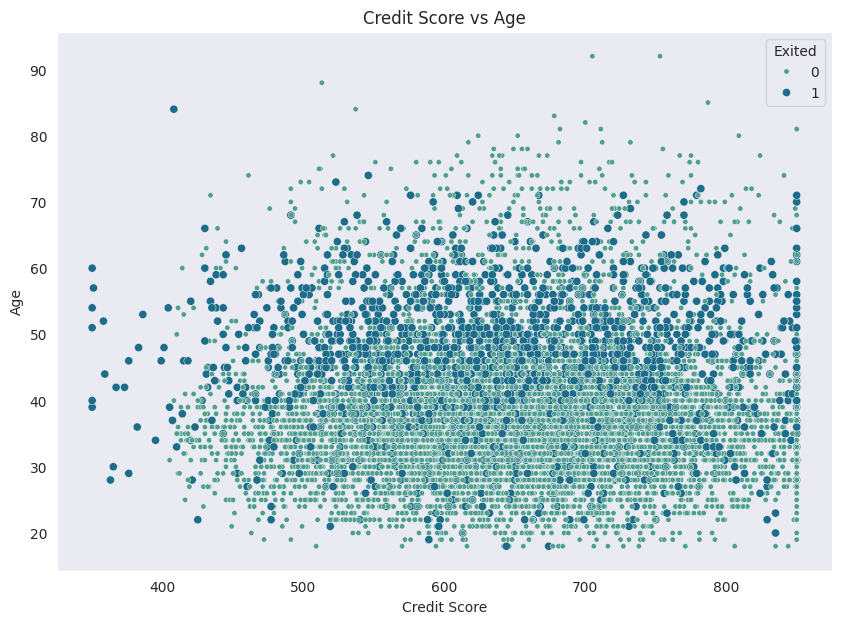

In [21]:
sns.set_style('dark')
plt.figure(figsize=(10,7))
sns.scatterplot(data= df, x='CreditScore', y='Age',hue='Exited',size = 'Exited',sizes=(15,35),size_order=(1,0),palette='crest')
plt.title('Credit Score vs Age')
plt.ylabel('Age')
plt.xlabel('Credit Score')

Text(0.5, 1.0, 'Correlation Matrix')

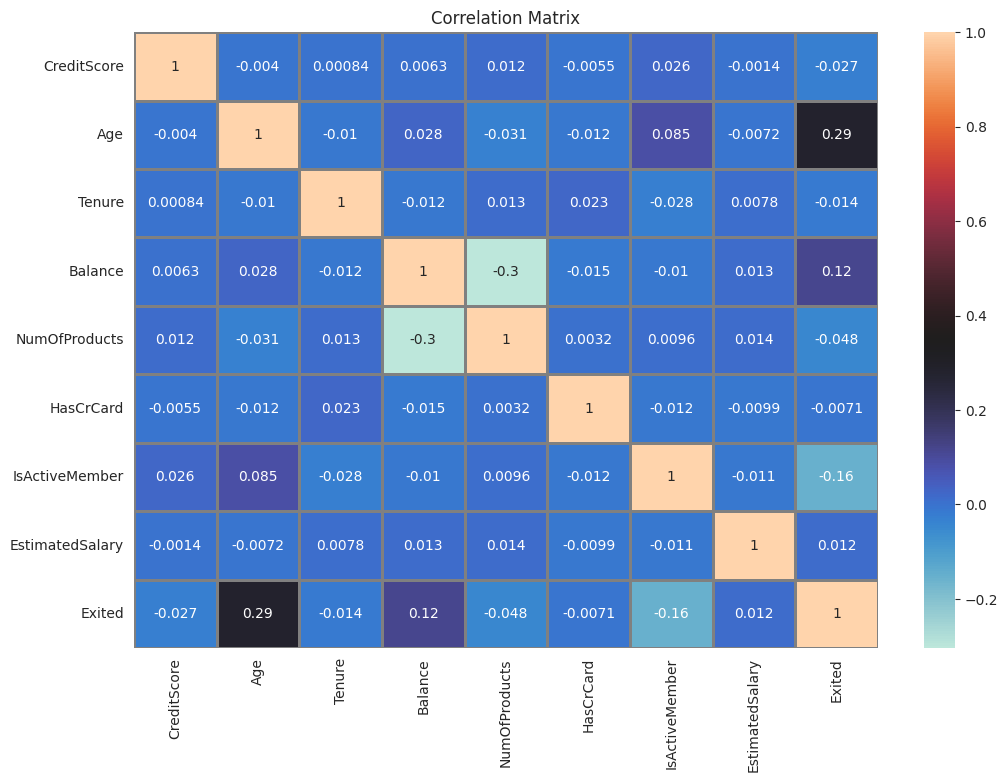

In [22]:
df1 = df.drop(columns=['Gender','Geography'])
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='icefire',linewidths=0.8,linecolor='grey')
plt.title('Correlation Matrix')

# Feature Engineering

In [23]:
df["NewAGT"] = df["Age"] - df["Tenure"]
df["CreditsScore"] = pd.qcut(df['CreditScore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["EstimatedSalary"] / 12

# Converting Categorical Data Into Numerical Data Using Encoding Methods

In [24]:
df = pd.get_dummies(df, columns = ["Geography", "Gender"], drop_first = True)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,False,True,False


# Feature Scalling

In [26]:
def scaling(df):
    cat_df = df[["Geography_Germany", "Geography_Spain", "Gender_Male"]]
    y = df["Exited"]
    X = df.drop(["Exited","Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"], axis = 1)
    Z = df[['HasCrCard','IsActiveMember']]
    cols = X.columns
    index = X.index

    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import StandardScaler
    X = RobustScaler().fit_transform(X)
    z = StandardScaler().fit_transform(Z)
    X = pd.DataFrame(X, columns = cols, index = index)
    z = pd.DataFrame(z, columns = ['HasCrCard','IsActiveMember'], index = index)
    X = pd.concat([X, cat_df,z], axis = 1)
    return X, y

In [32]:
X, y = scaling(df)      # Calling the scalled data

print(y)                # printing the pre-processed data


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split    # splitting the data into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [29]:
print(X_train.shape)     # printing the split data
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 17)
(2000, 17)
(8000,)
(2000,)


As we saw in the piechart, the dataset contains only **20.37 %**  churned customers which is the minority class . therefore the  dataset is a highly imbalanced dataset and we need to perform some sampling techniques to balance the dataset .

In [30]:
def balancing(X_train, y_train):
    from imblearn.over_sampling import SMOTE

    smk = SMOTE()
    # Oversample training data
    X_train, y_train = smk.fit_resample(X_train, y_train)

    return X_train, y_train


In [31]:
X_train_balanced, y_train_balanced = balancing(X_train, y_train)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


def model(X_train_balanced, X_test, y_train_balanced, y_test):
    models = [
        ('LR', LogisticRegression(random_state=42)),
        ('KNN', KNeighborsClassifier()),
        ('DT', DecisionTreeClassifier(random_state=42)),
        ('RF', RandomForestClassifier(random_state=42)),
        ('SVM', SVC(gamma='auto', random_state=42)),
        ('XGB', GradientBoostingClassifier(random_state=42)),
        ('LightGBM', LGBMClassifier(random_state=42))
    ]

    # DataFrame to hold results
    result_df = pd.DataFrame(columns=["model", "accuracy_score"])

    # Evaluate each model
    for index, (name, model) in enumerate(models):
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result_df.loc[index] = [name, accuracy]

    # Return sorted DataFrame
    return result_df.sort_values("accuracy_score", ascending=False)



In [45]:
result_df = model(X_train_balanced, X_test, y_train_balanced, y_test)
result_df

[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3074
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,model,accuracy_score
6,LightGBM,0.8630
3,RF,0.8525
5,XGB,0.8385
4,SVM,0.8095
2,DT,0.7795
1,KNN,0.7500
0,LR,0.7175


In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_models(X_train_balanced, y_train_balanced):

    param_grids = {
        'LR': {
            'model': LogisticRegression(random_state=42),
            'params': {
                'penalty': ['l1', 'l2'],
                'C': [0.001, 0.01, 0.1, 1, 10],
                'solver': ['liblinear'] }},

        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']}},

        'DT': {
            'model': DecisionTreeClassifier(random_state=43),
            'params': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]}},

        'RF': {
            'model': RandomForestClassifier(random_state=44),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]}},

        'SVM': {
            'model': SVC(random_state=45),
            'params': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']}},

        'XGB': {
            'model': GradientBoostingClassifier(random_state=46),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]}},

        'LightGBM': {
            'model': LGBMClassifier(random_state=47),
            'params': {
                'num_leaves': [31, 50, 70],
                'learning_rate': [0.01, 0.1, 0.2],
                'n_estimators': [50, 100, 200]} }
    }

    # Store results
    tuned_results = []

    # Perform grid search for each model
    for model_name, config in param_grids.items():
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                                   cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_balanced, y_train_balanced)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        tuned_results.append({
            'model': model_name,
            'best_params': best_params,
            'best_score': best_score
        })

    return pd.DataFrame(tuned_results)

# Calling the function to tune models
tuned_results_df = tune_models(X_train_balanced, y_train_balanced)
print(tuned_results_df)



The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1. Churn Data Set read.

2. With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

3. During Model Building; Logistic Regression, KNN, SVM, Decesion Tree, Random Forests, XGBoost, LightGBM like using machine learning models Accuracy Score were calculated. Later XGBoost, LightGBM, hyperparameter optimizations optimized to increase Accuracy score.
